<a href="https://colab.research.google.com/github/AtrCheema/ai4water_examples/blob/master/docs/source/_notebooks/preprocessing/hru_discretization_laos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Intro
This notebook shows hru discretization using the land use, soil and sub-bains shapefiles of `Houay Pano` catchment, Laos. 

In [1]:

import site
site.addsitedir("D:\\mytools\\AI4Water")

import os

from ai4water.utils.utils import get_version_info

from ai4water.preprocessing.spatial_processing import MakeHRUs
from ai4water.datasets import MtropicsLaos


D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
for lib, ver in get_version_info().items():
    print(lib, ver)

python 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:16) [MSC v.1916 64 bit (AMD64)]
os nt
ai4water 1.06
lightgbm 3.3.1
tcn 3.4.0
catboost 0.26
xgboost 1.5.0
easy_mpl 0.21.3
SeqMetrics 1.3.3
tensorflow 2.7.0
keras.api._v2.keras 2.7.0
numpy 1.21.0
pandas 1.3.4
matplotlib 3.4.3
h5py 3.5.0
sklearn 1.0.1
shapefile 2.3.0
fiona 1.8.22
xarray 0.20.1
netCDF4 1.5.7
optuna 2.10.1
skopt 0.9.0
hyperopt 0.2.7
plotly 5.3.1
lime NotDefined
seaborn 0.11.2


if the above cell does not show [``fiona``](https://github.com/Toblerity/Fiona) as installed, we can not proceed because fiona
is required for processing of shapefiles of Laos. See notebook [`hru_discretization.ipynb`](https://github.com/AtrCheema/AI4Water/blob/master/examples/paper/hru_discretization.ipynb)
for results with hypothetical catchment. If you are on windows, you may try installing fiona from [wheels](https://www.lfd.uci.edu/~gohlke/pythonlibs/#fiona)

In [3]:
laos = MtropicsLaos(path="F:\\data\\MtropicsLaos")
shapefiles_path = laos.ds_dir
print(f'directory where Laos data is saved is: {shapefiles_path}')


    Not downloading the data since the directory 
    F:\data\MtropicsLaos already exists.
    Use overwrite=True to remove previously saved files and download again
directory where Laos data is saved is: F:\data\MtropicsLaos


In [4]:
Soil_shp = os.path.join(shapefiles_path, 'soilmap', 'soilmap.shp')
SubBasin_shp = os.path.join(shapefiles_path, 'subs1', 'subs1.shp')

years = {2011: {'shapefile': os.path.join(shapefiles_path, 'lu1', 'LU2011.shp'), 'feature': 'NAME'},
         2012: {'shapefile': os.path.join(shapefiles_path, 'lu1', 'LU2012.shp'), 'feature': 'NAME'},
         2013: {'shapefile': os.path.join(shapefiles_path,'lu1', 'LU2013.shp'), 'feature': 'NAME'},
         2014: {'shapefile': os.path.join(shapefiles_path,'lu1', 'LU2014.shp'), 'feature': 'NAME'},
         }

In [5]:
def run_and_plot(index):


    for yr in index:
        hru_object.draw_pie(yr, n_merge=4, title=False, textprops={'fontsize': '12'})

    hru_object.plot_as_ts(min_xticks=3, max_xticks=4)

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


__len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
__len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
__getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.


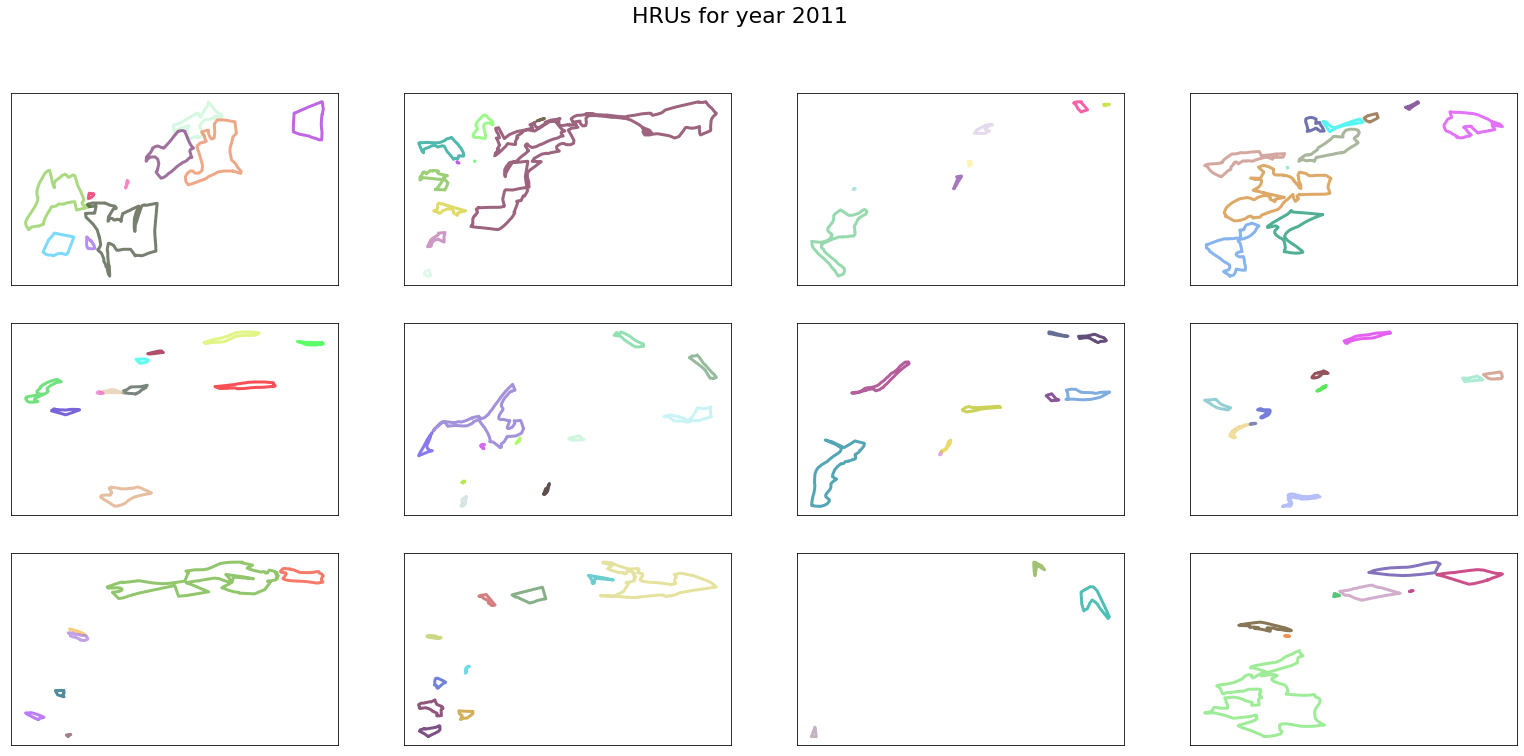

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


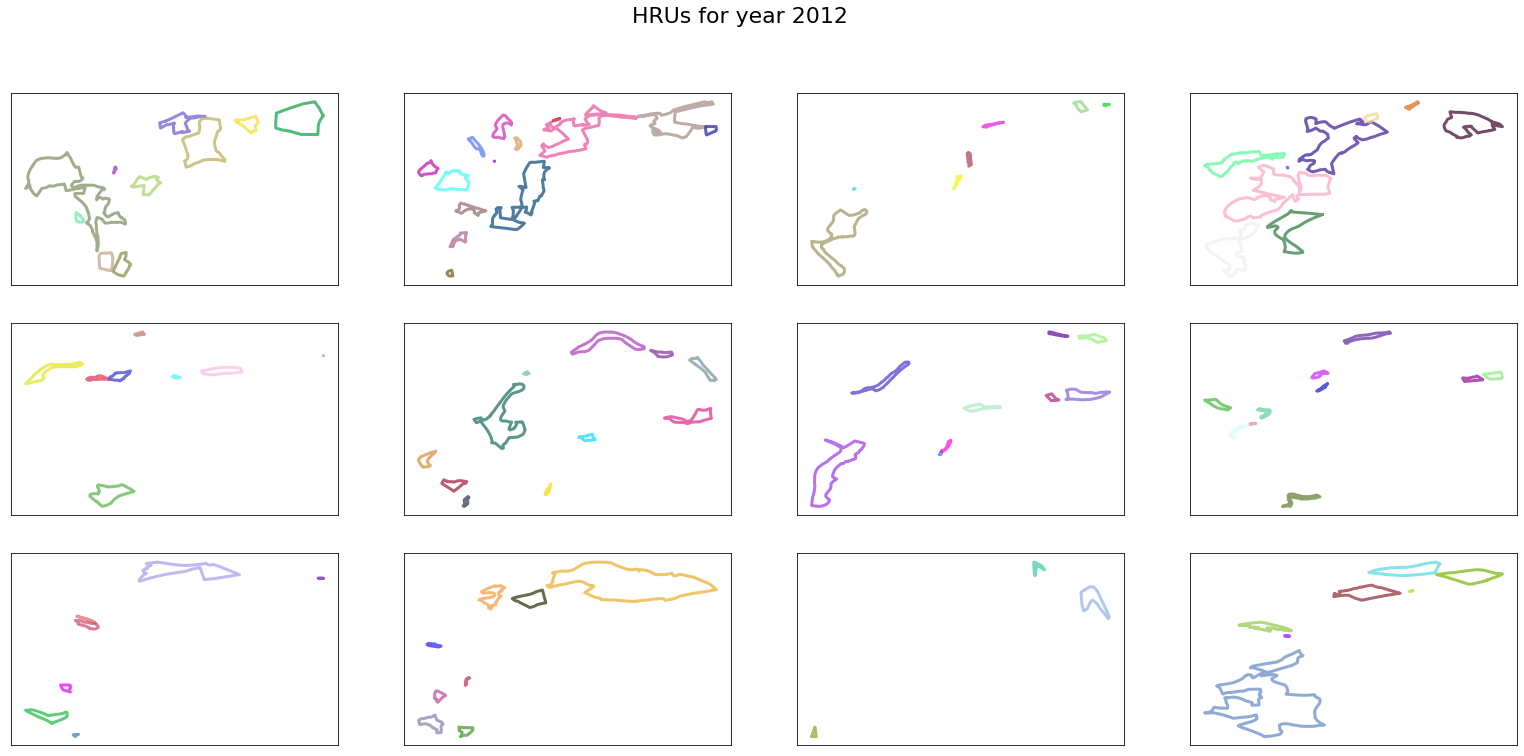

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


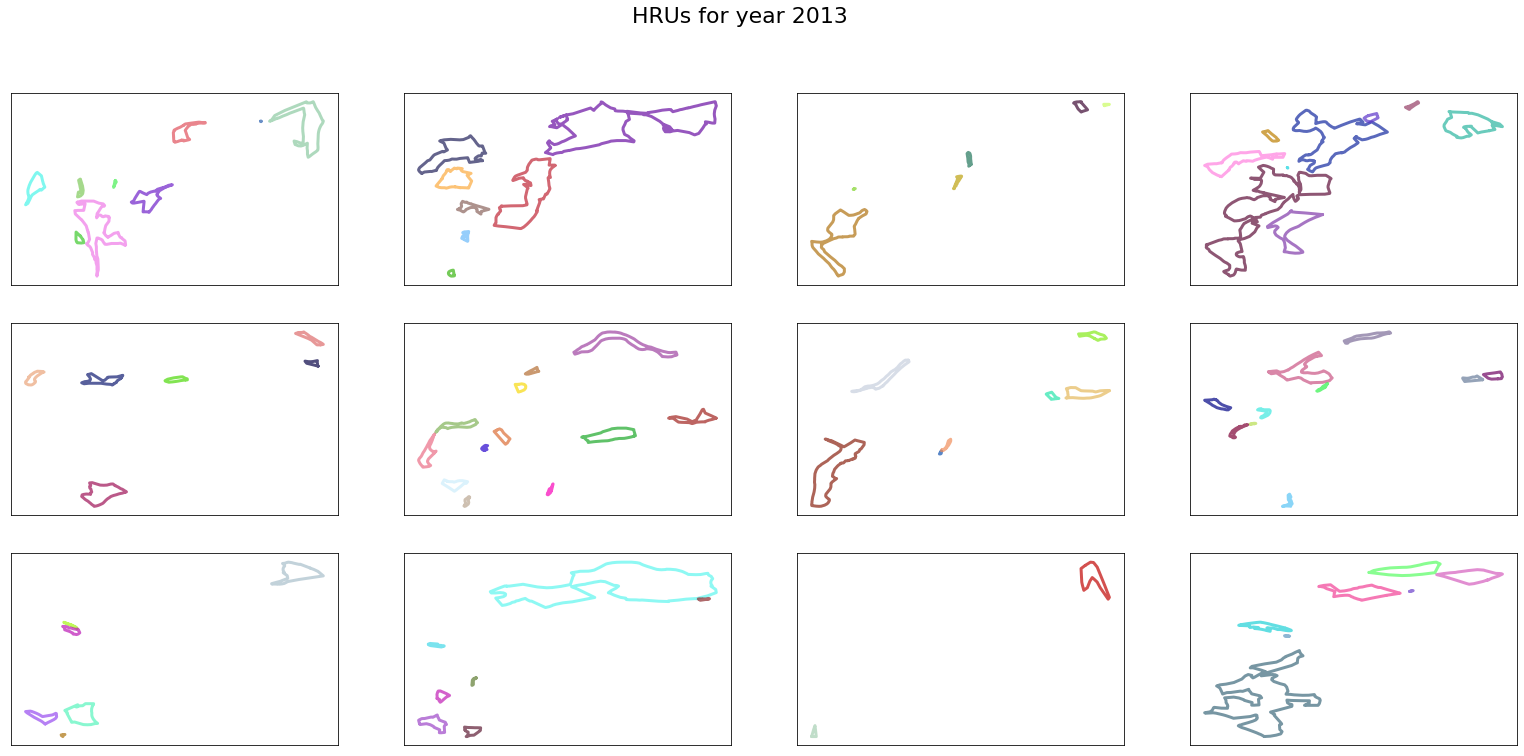

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


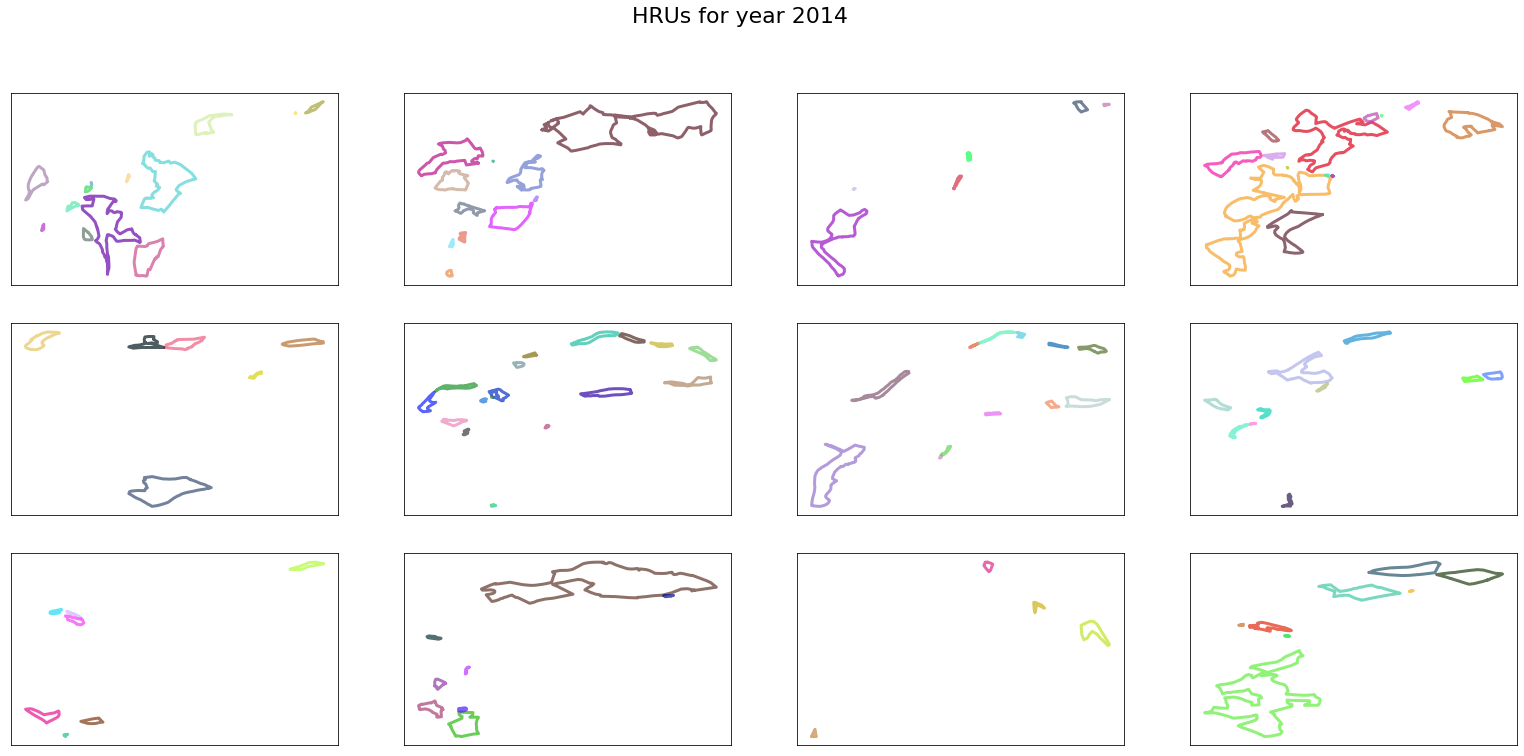

In [6]:
hru_object = MakeHRUs(
    'unique_lu_soil',
    index=years,
    soil_shape={'shapefile': Soil_shp, 'feature': 'SOIL_GROUP'}
)

hru_object.call()

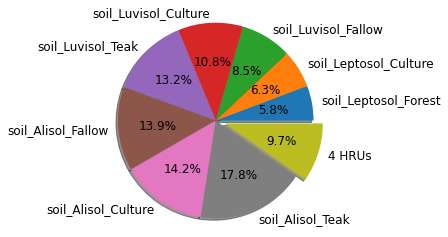

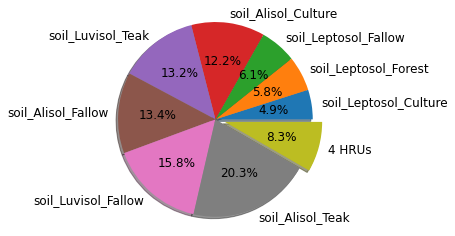

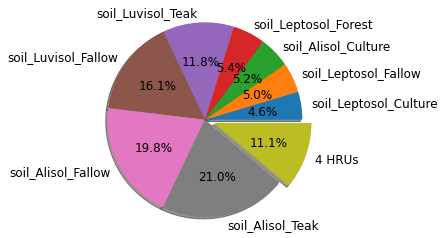

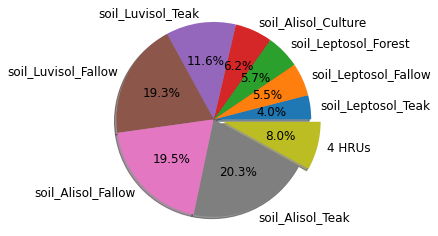

In [7]:
for yr in years:
    hru_object.draw_pie(yr, n_merge=4, title=False, textprops={'fontsize': '12'})

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.


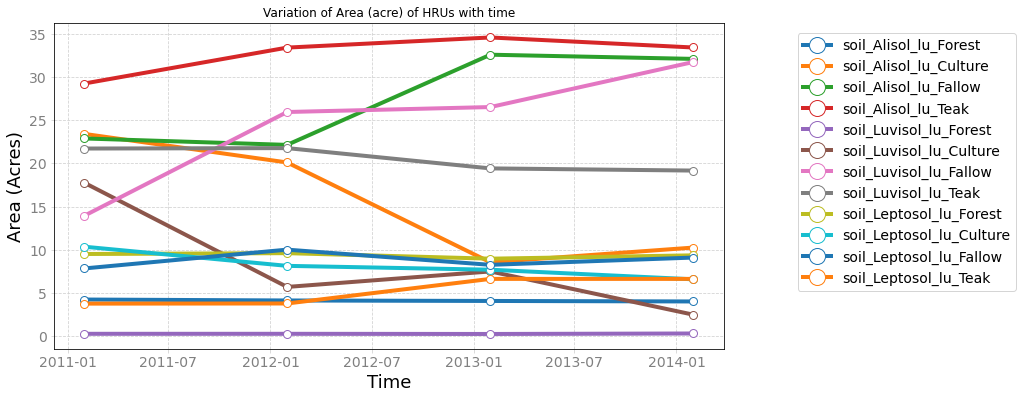

In [8]:
_ = hru_object.plot_as_ts(min_xticks=3, max_xticks=4)

In [9]:
years = {}
for yr in range(1998, 2020):
    years[yr] = {'shapefile': os.path.join(shapefiles_path, 'lu1', f'LU{yr}.shp'), 'feature': 'NAME'}

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


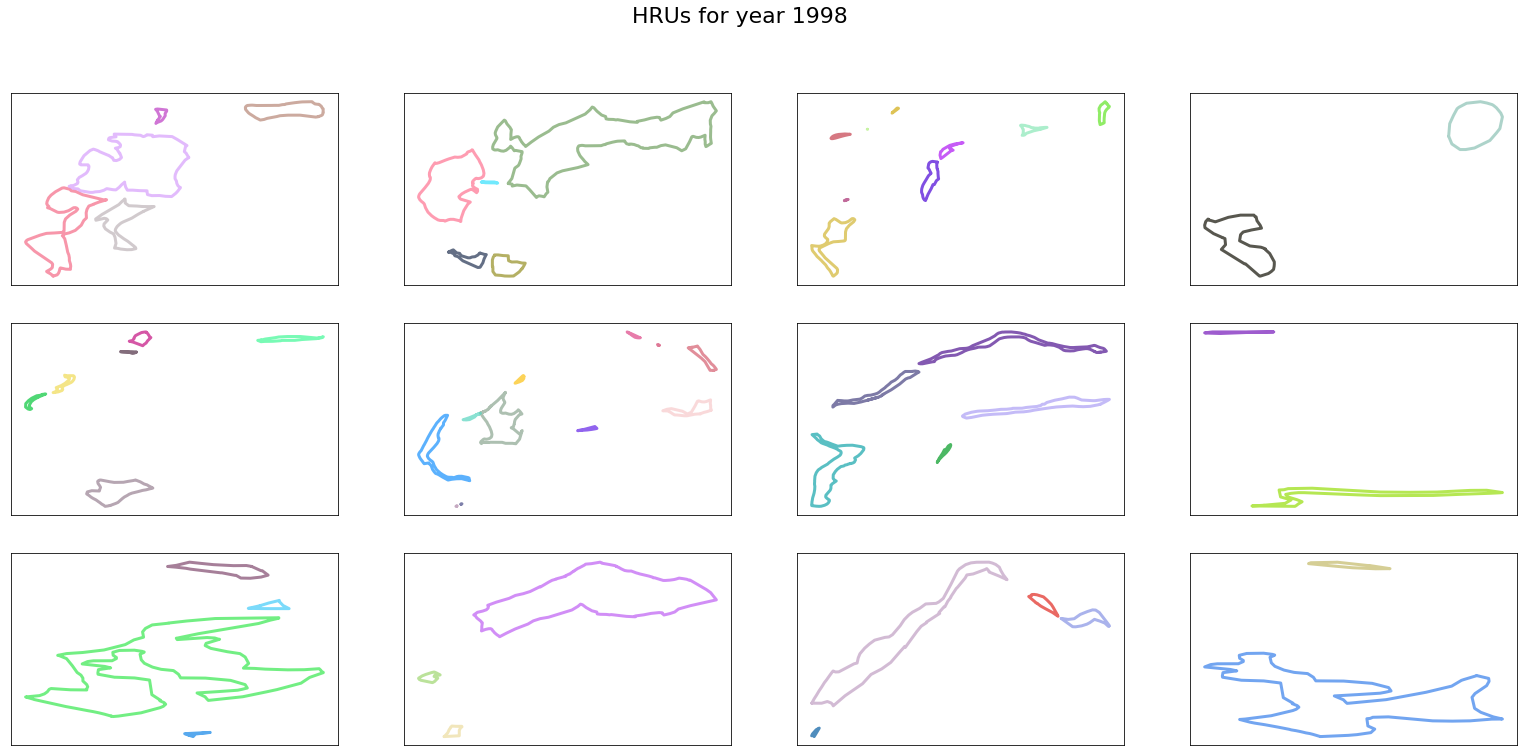

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


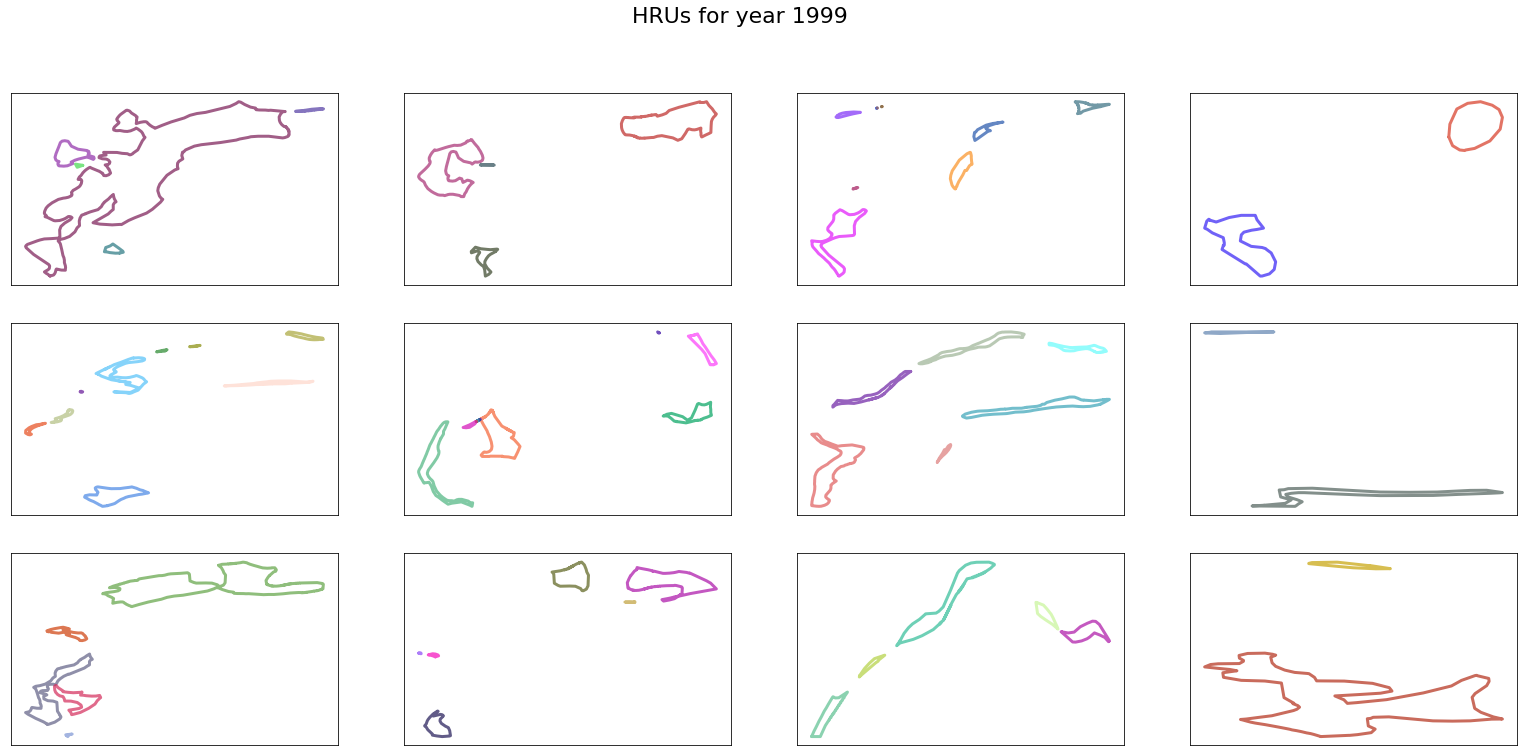

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


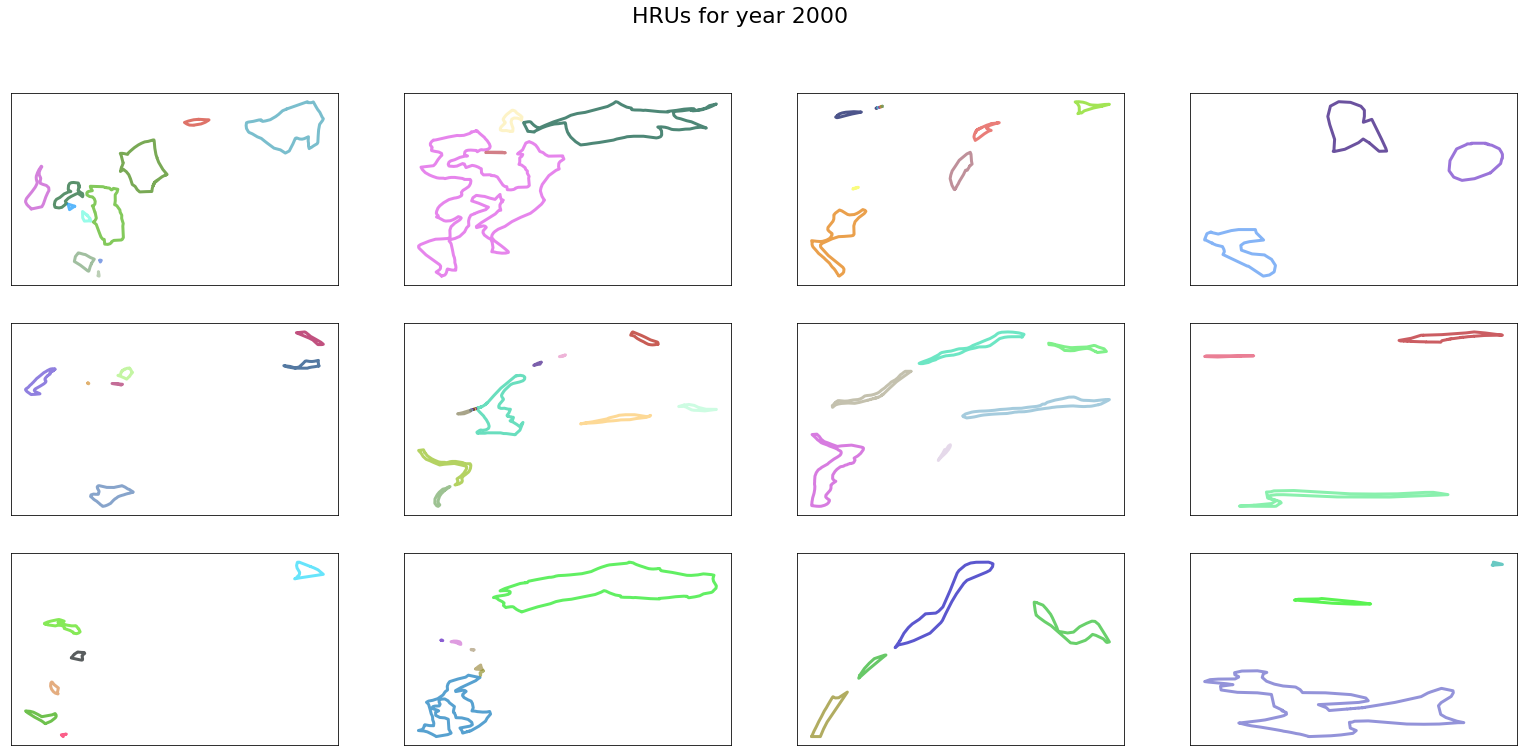

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


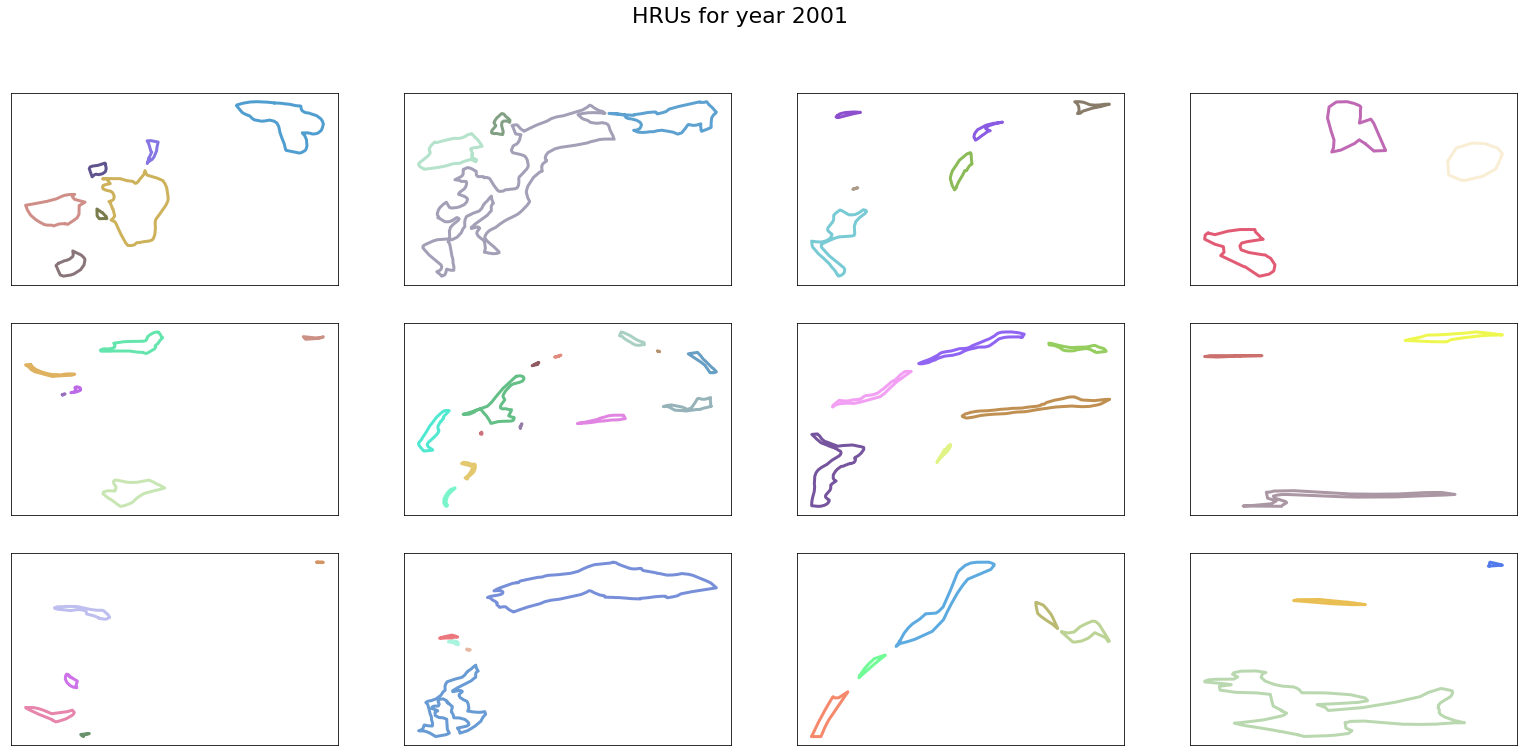

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


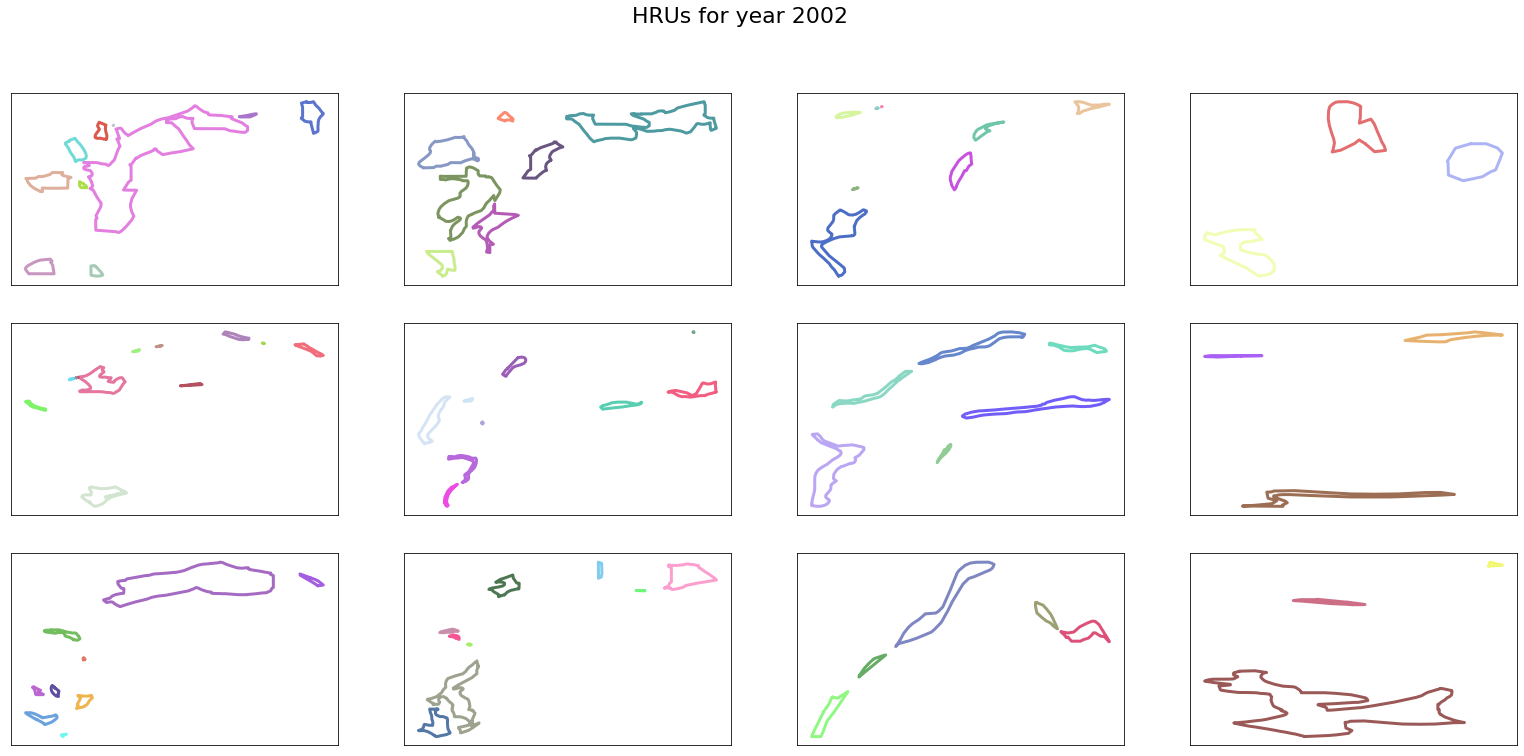

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


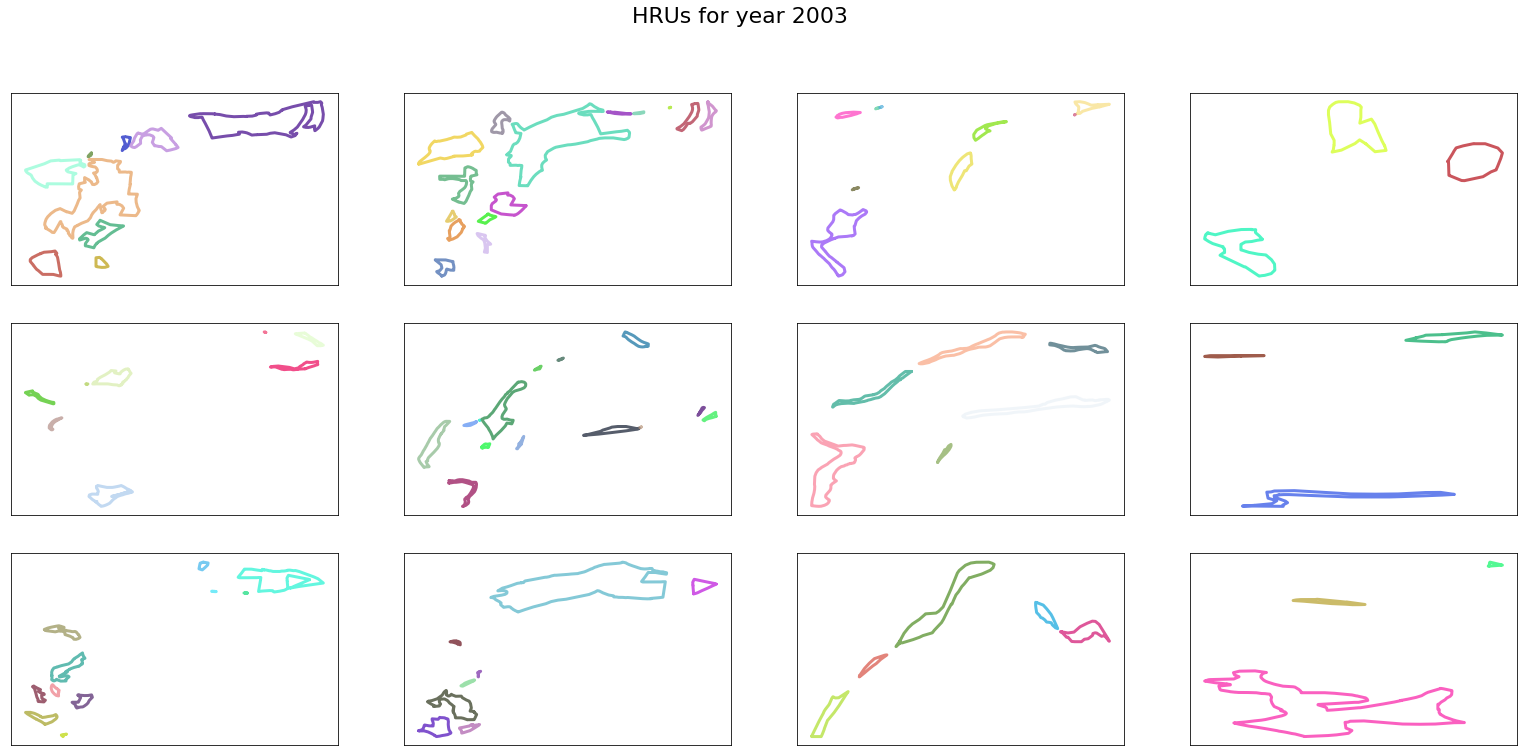

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


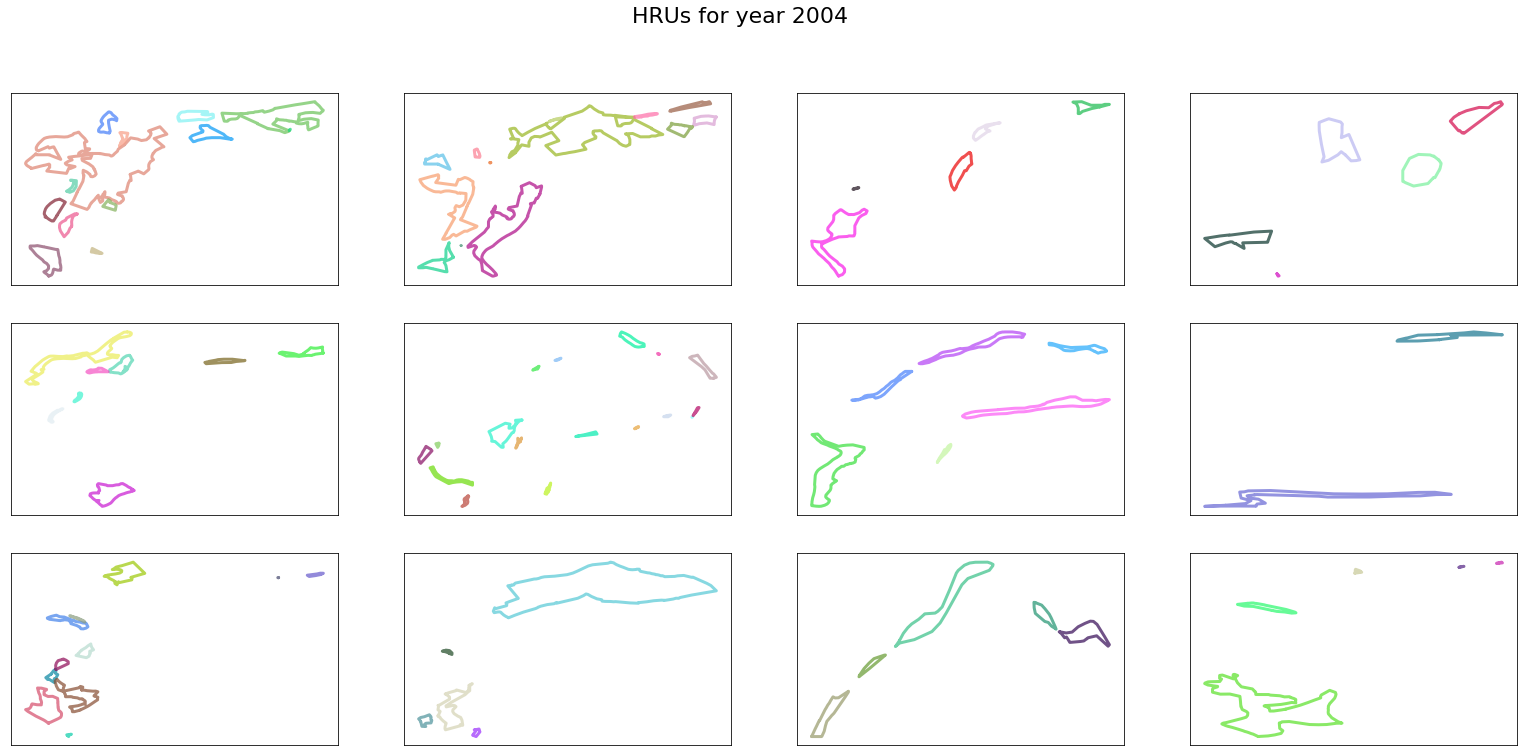

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


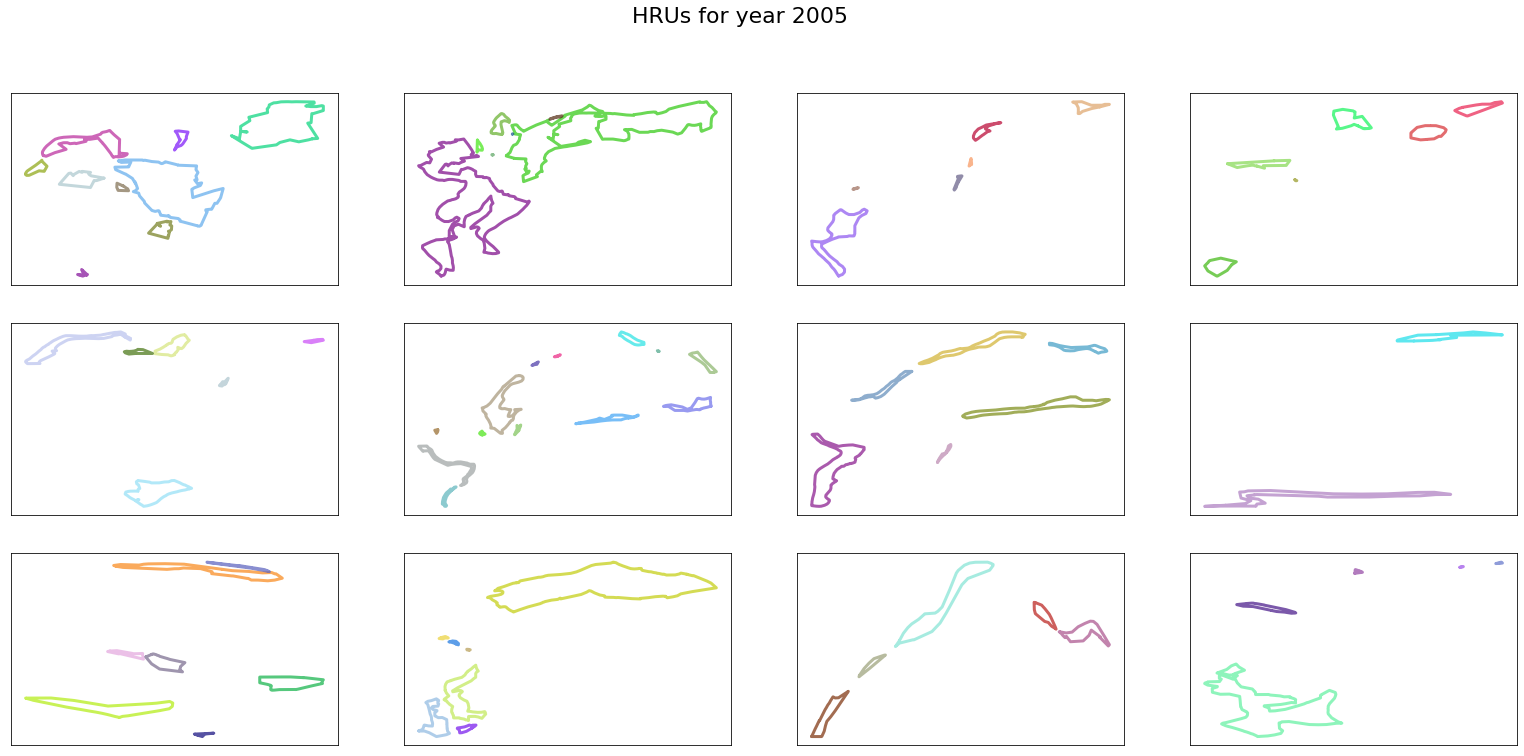

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


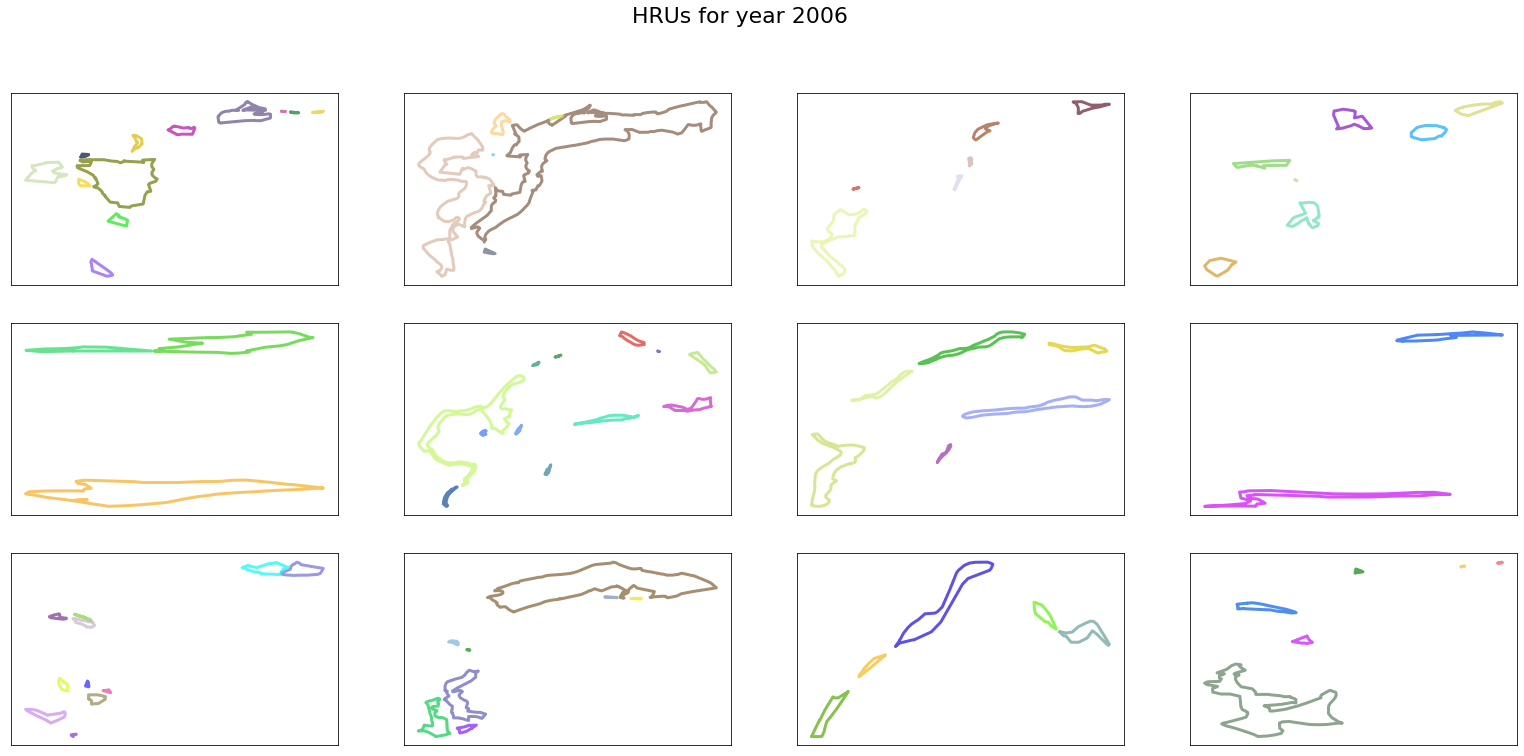

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


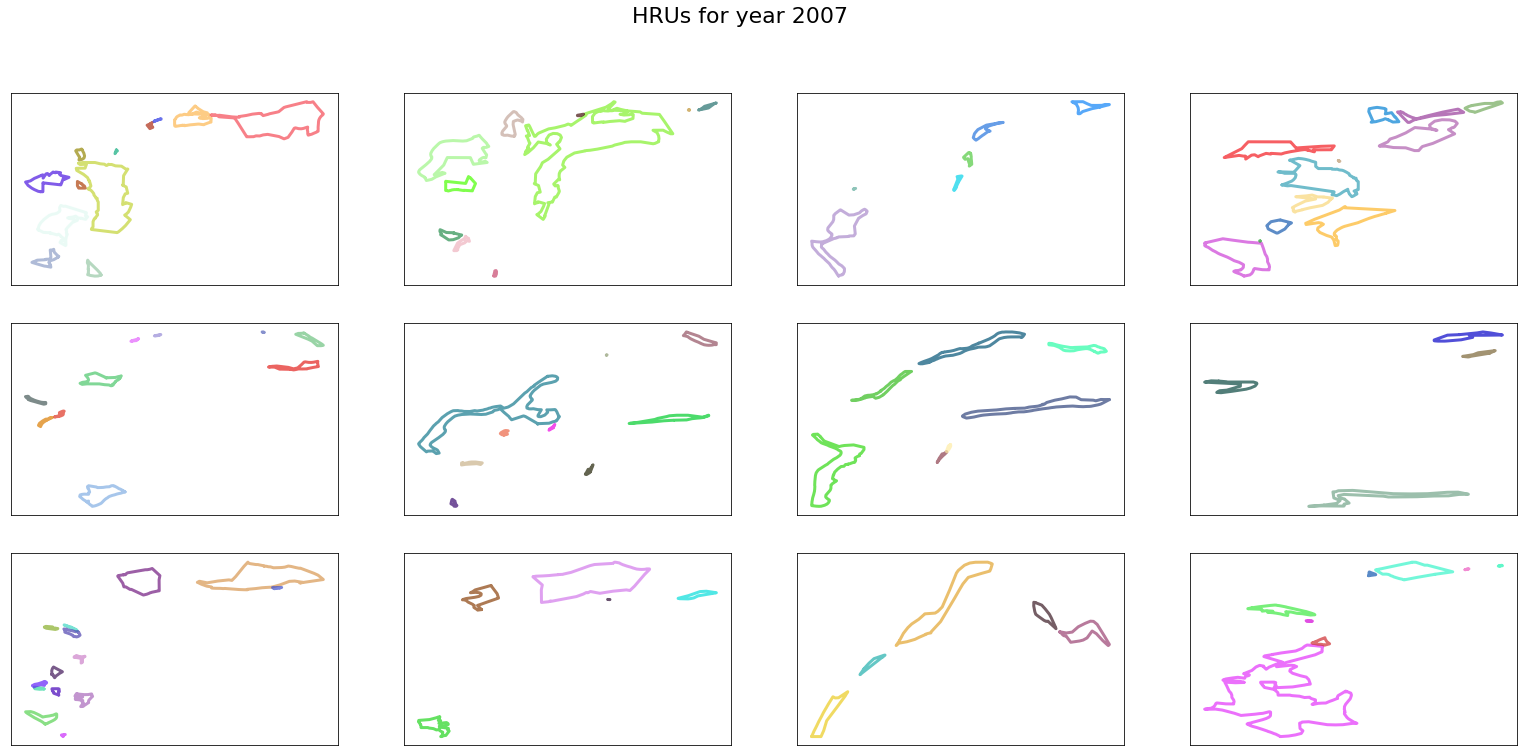

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


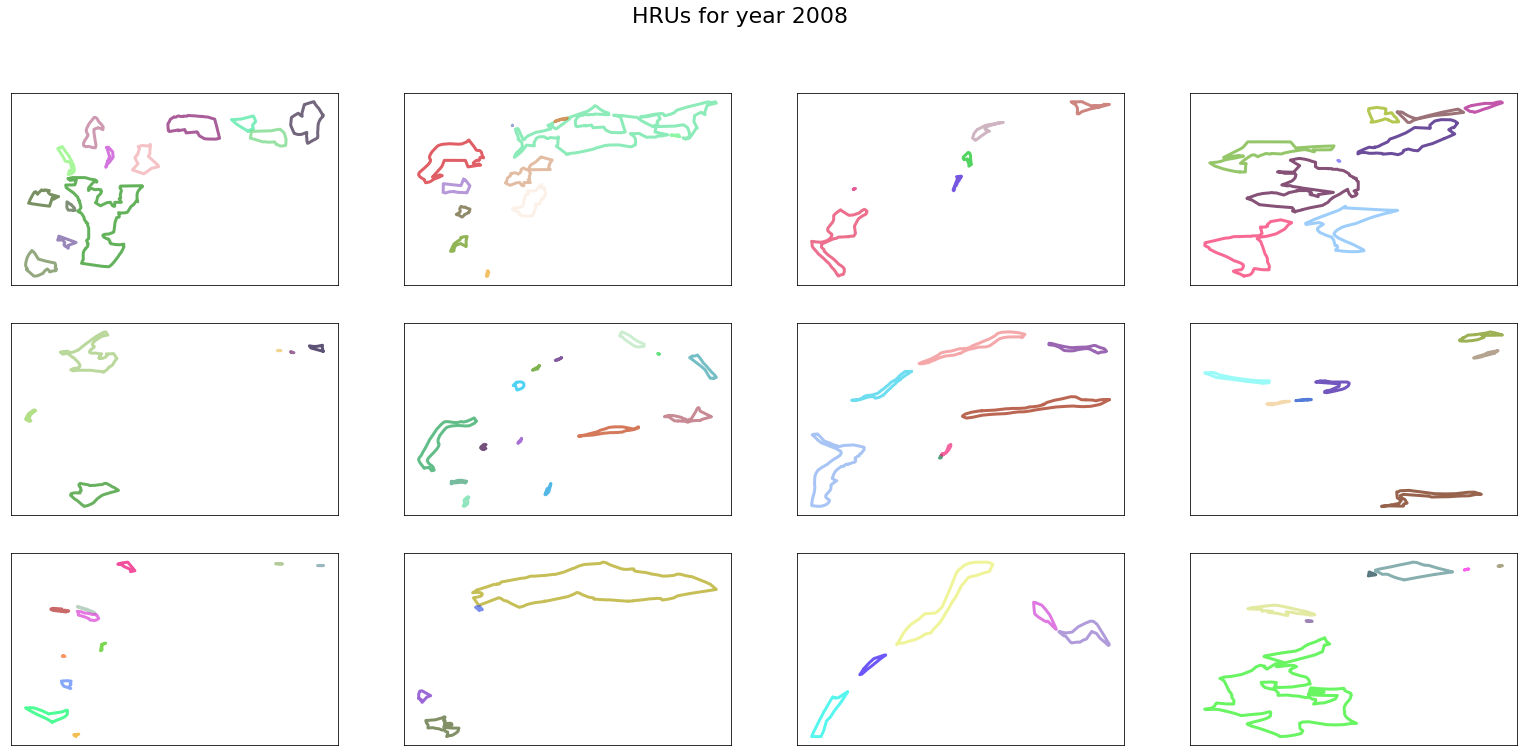

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


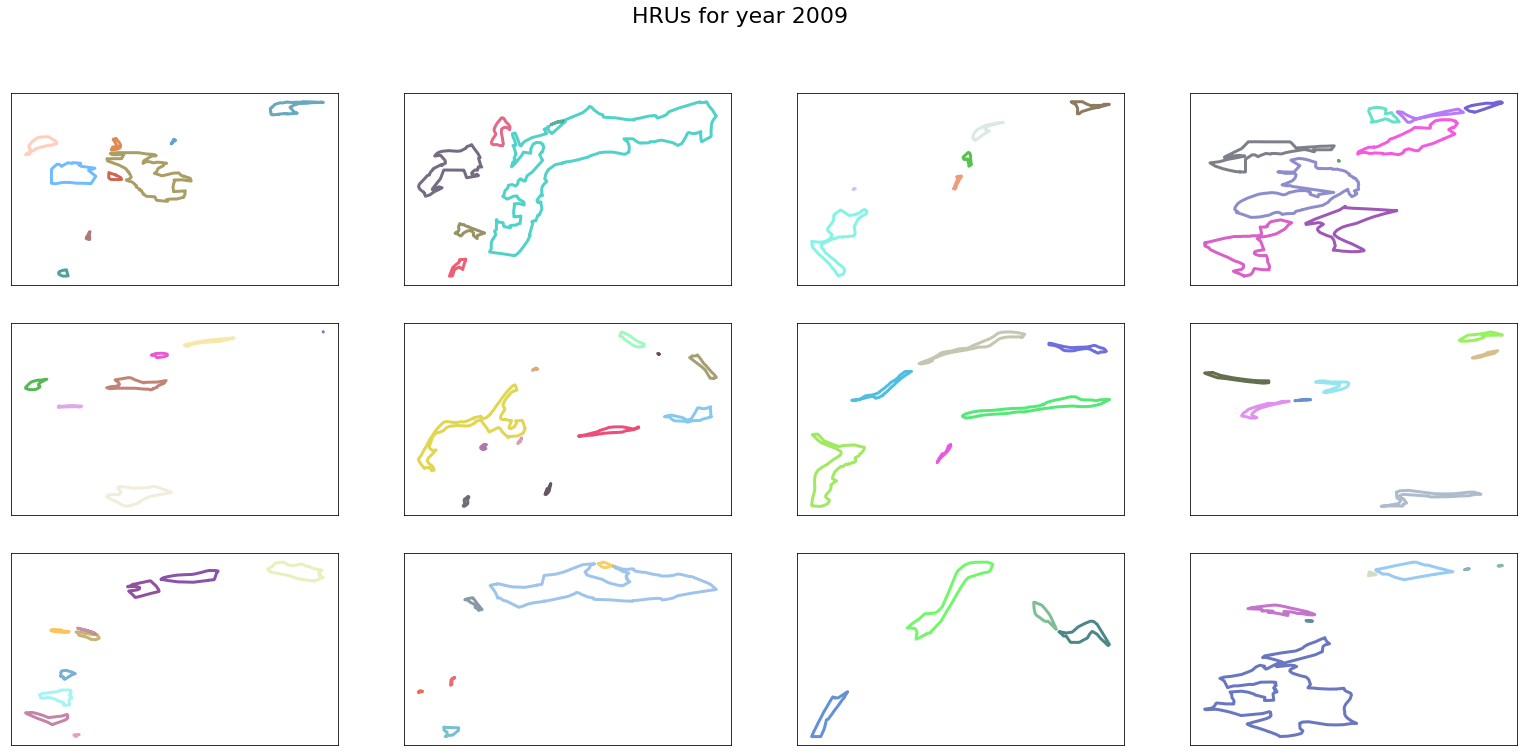

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


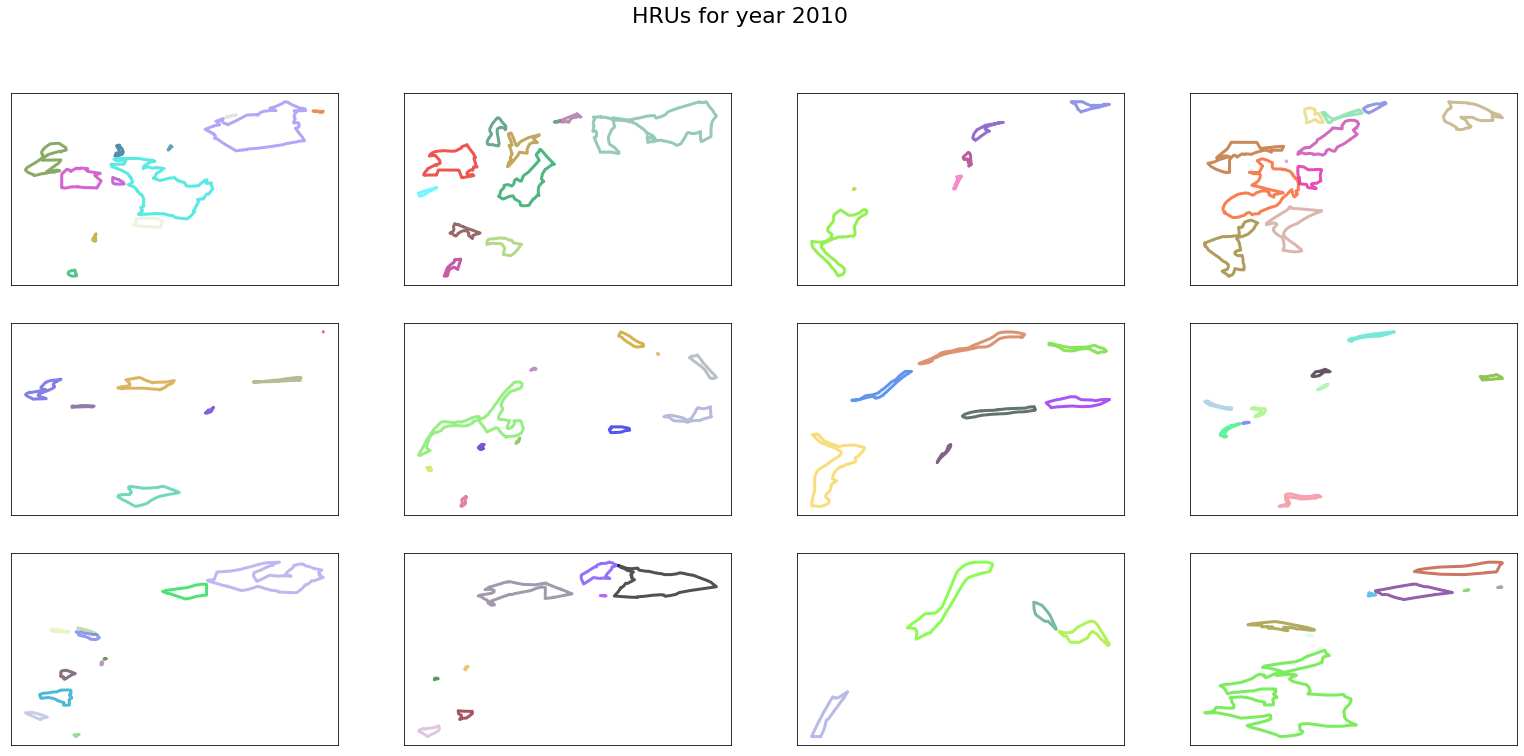

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


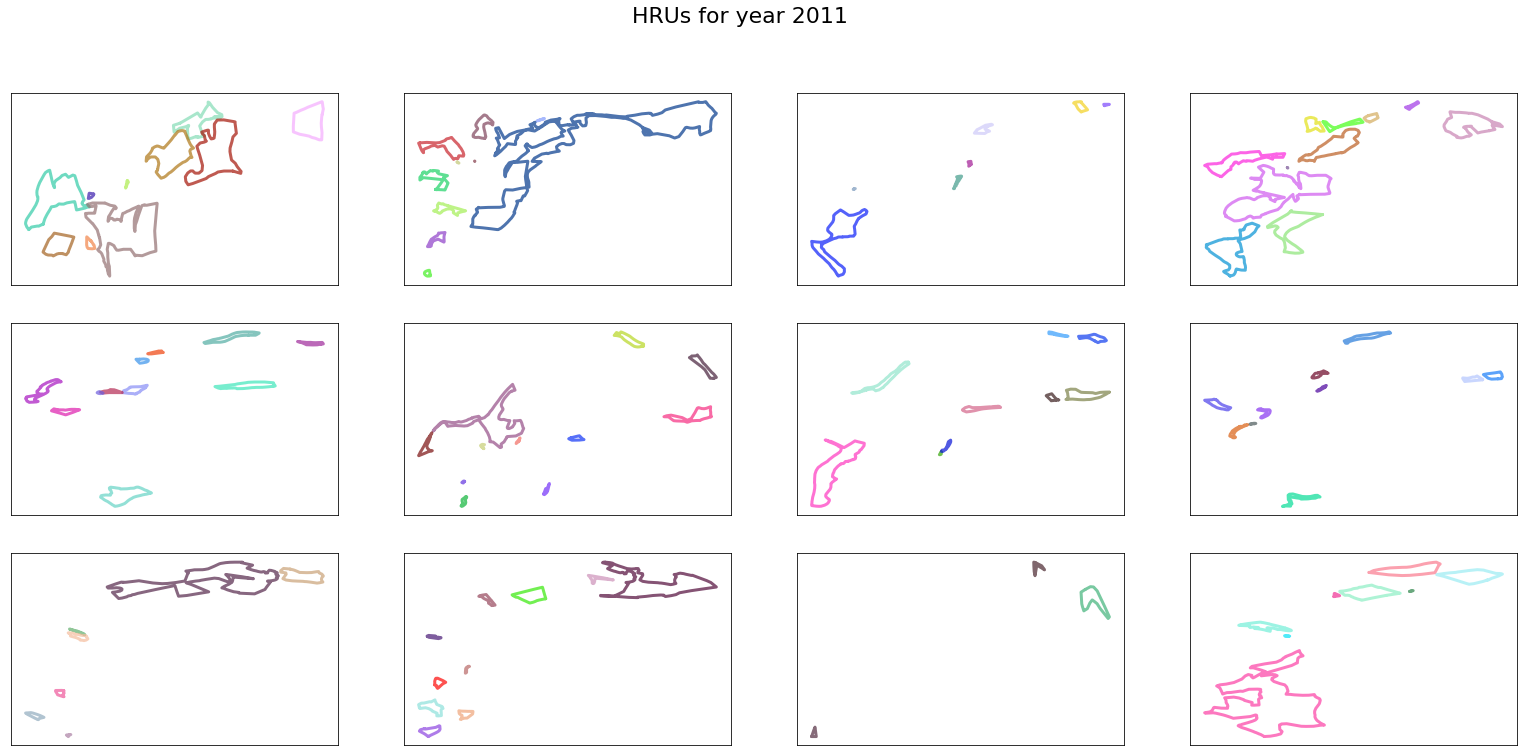

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


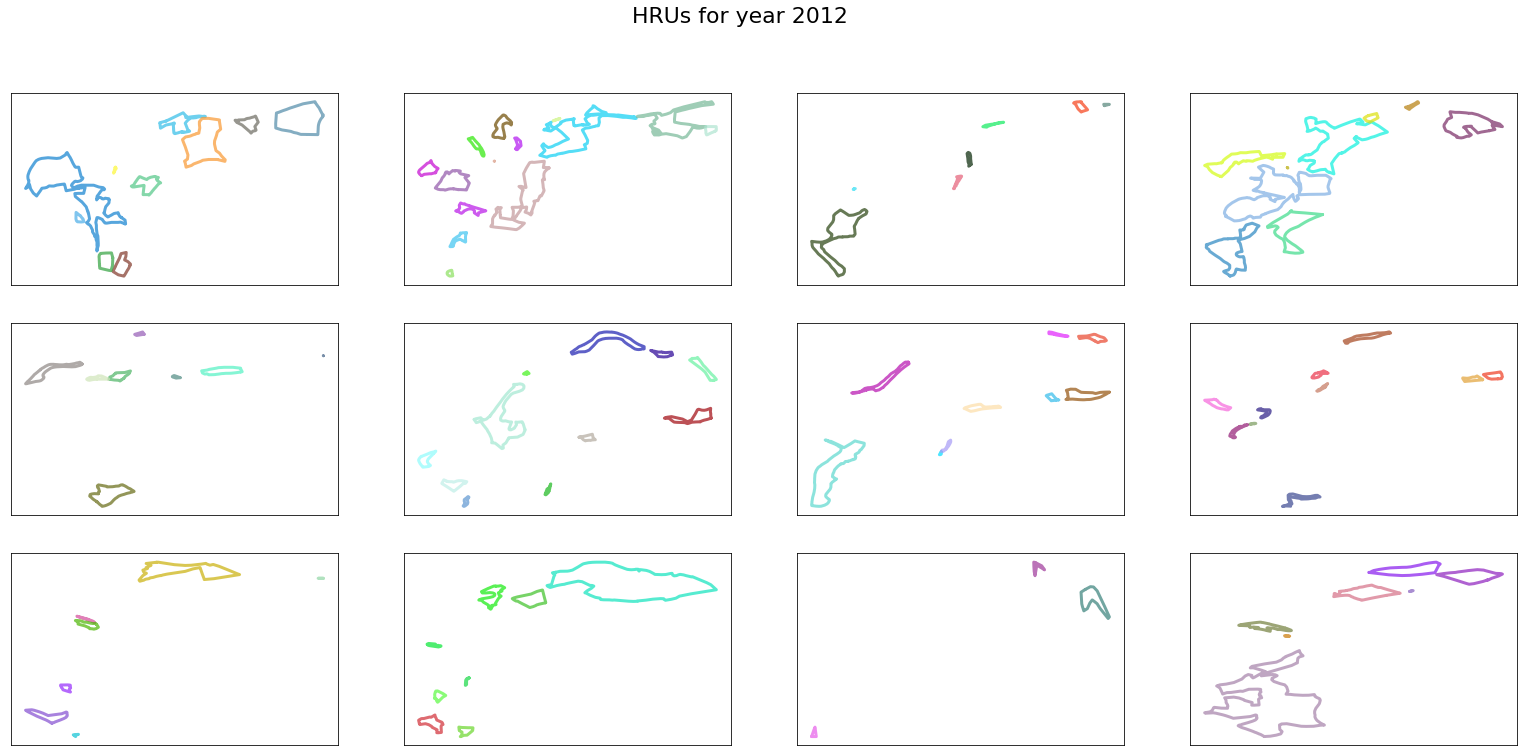

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


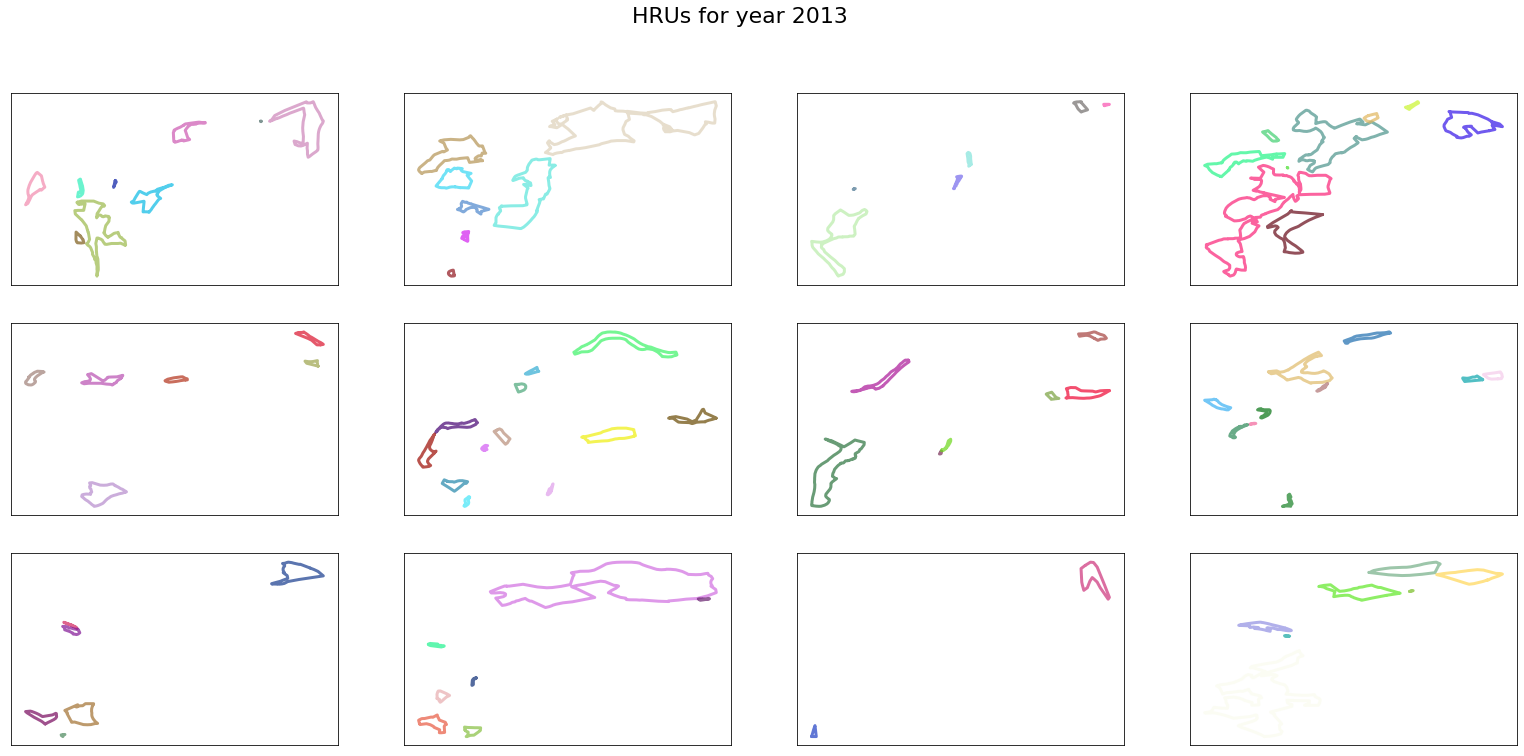

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


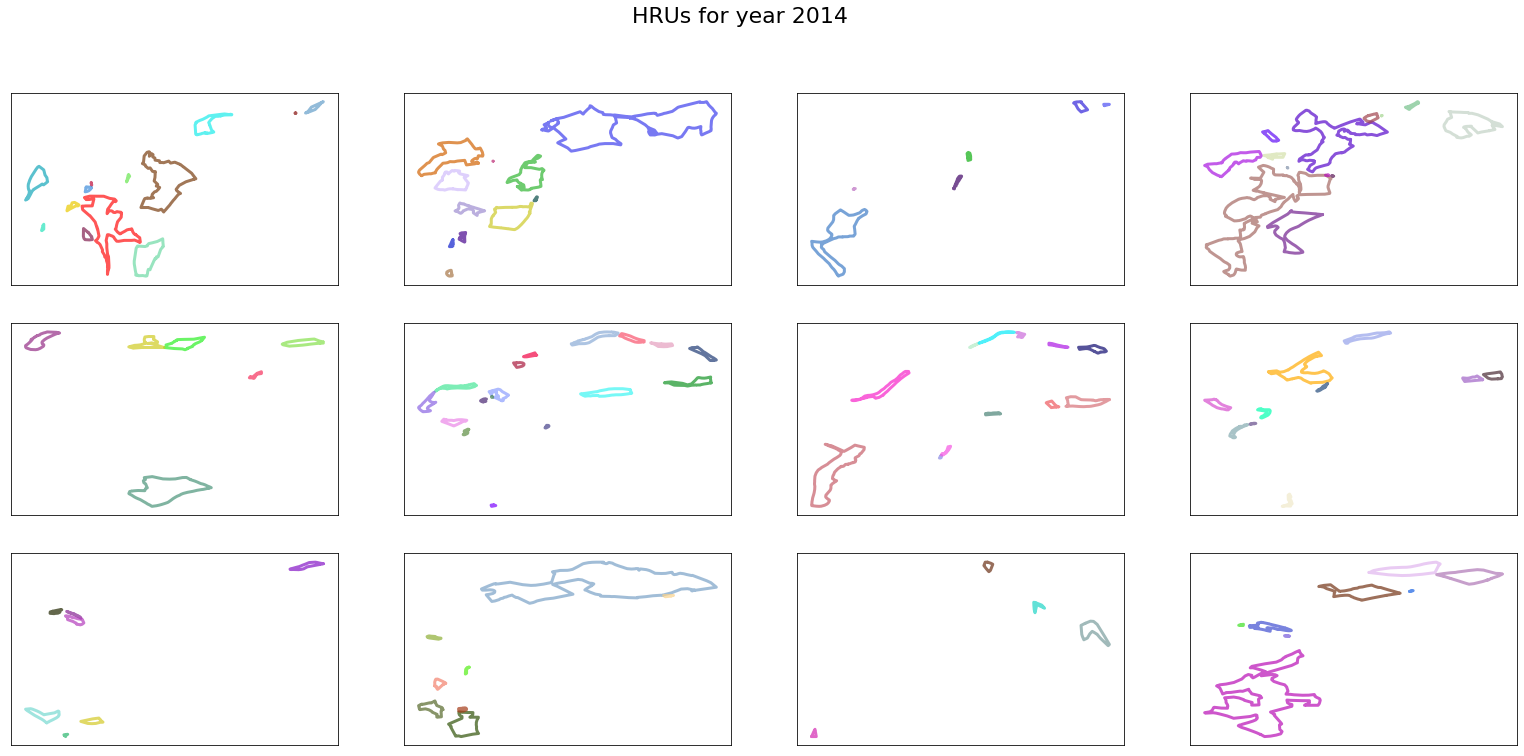

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


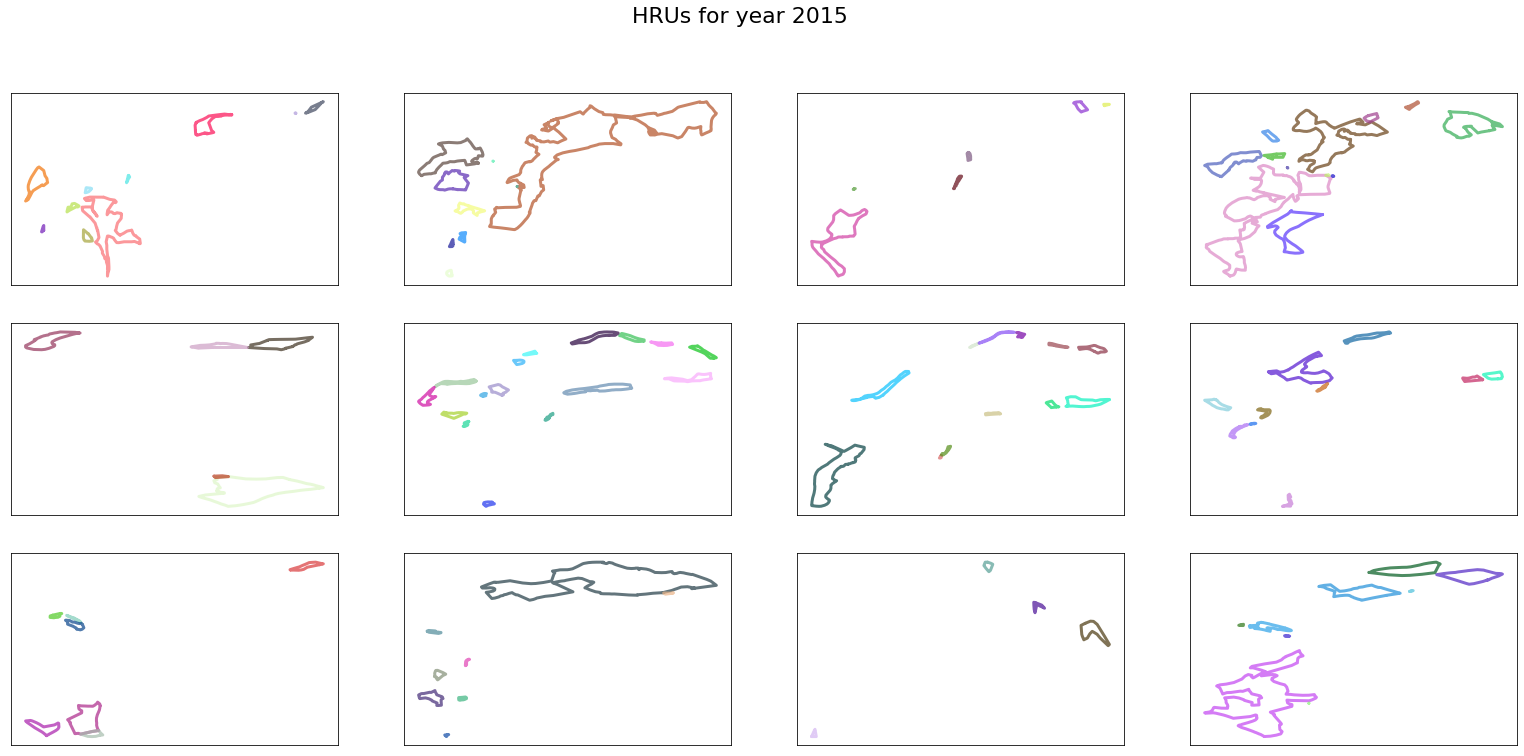

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


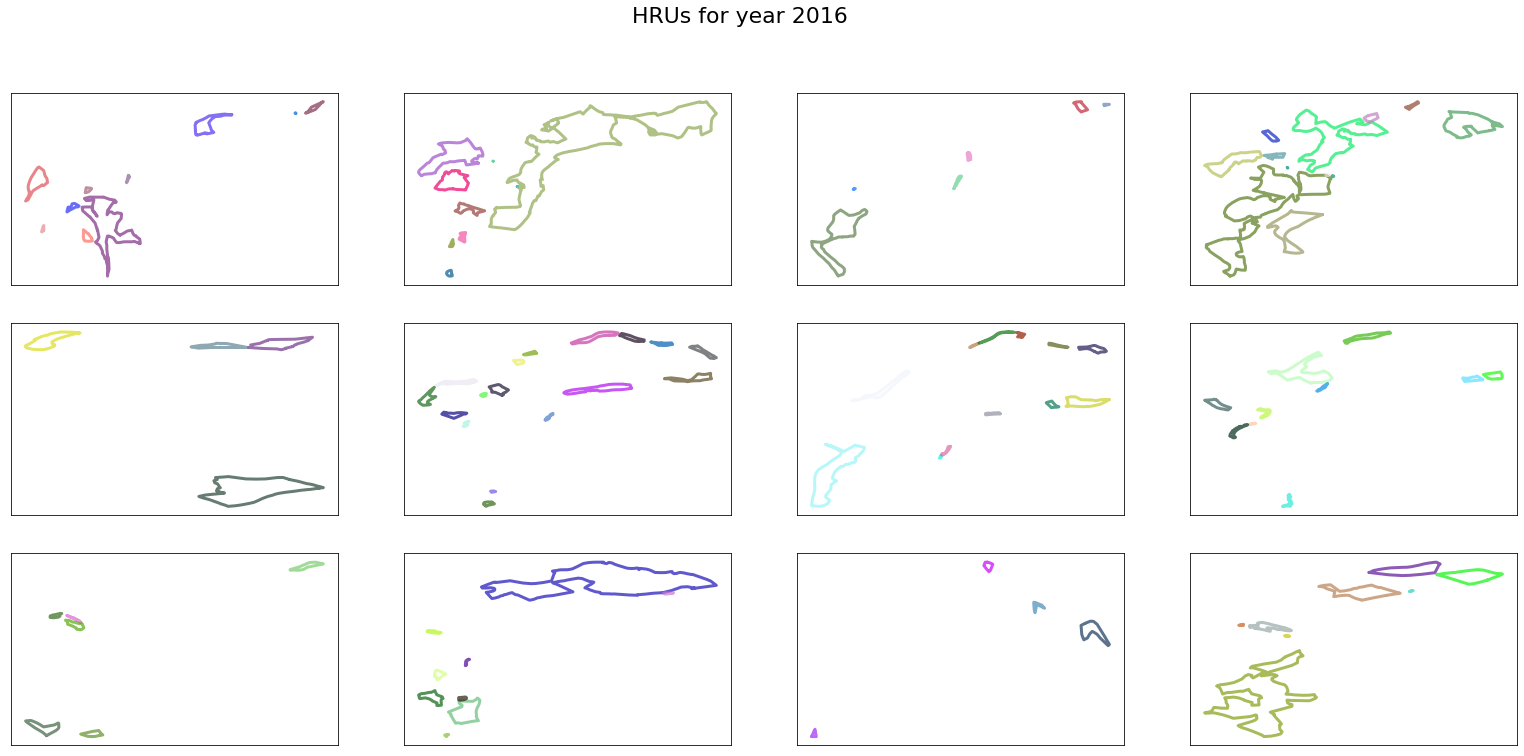

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


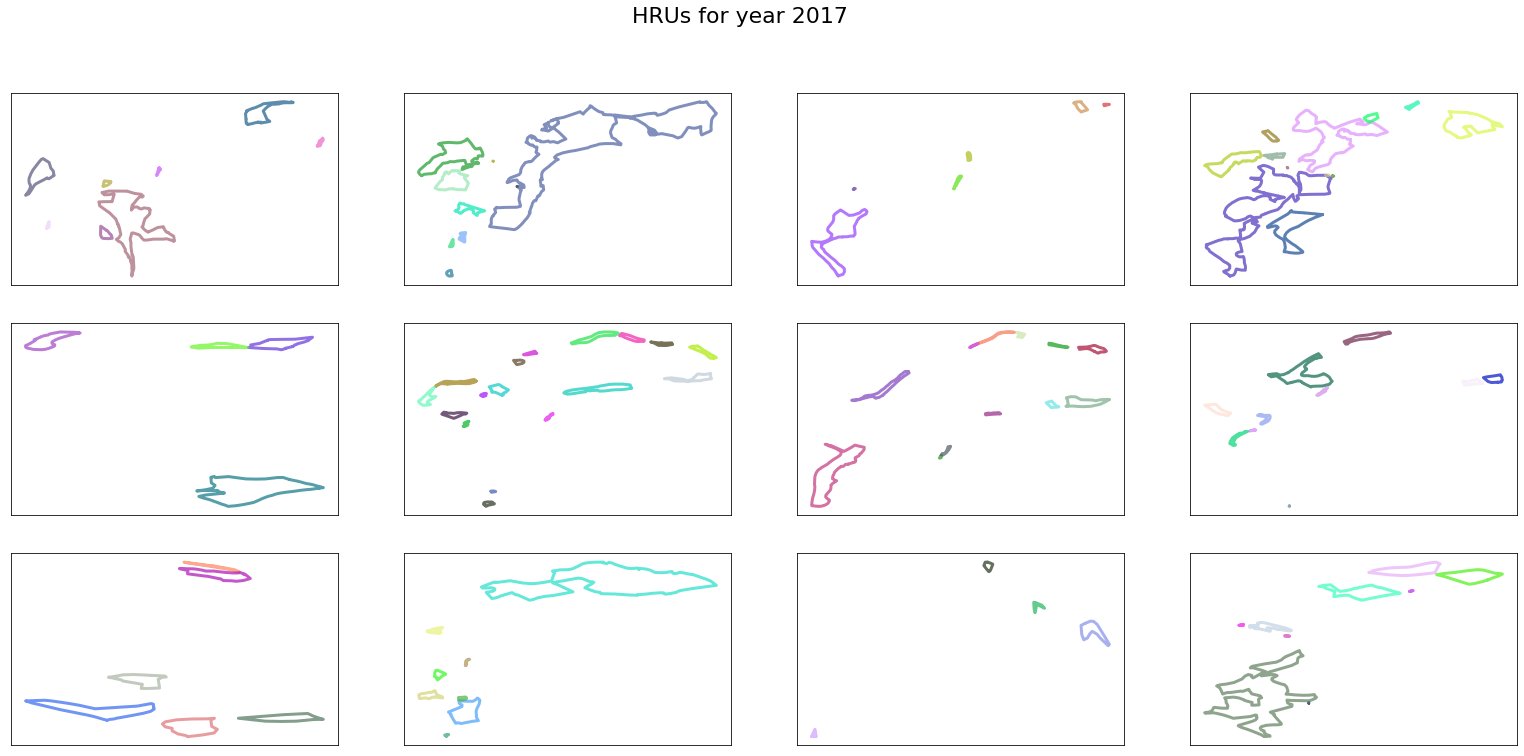

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


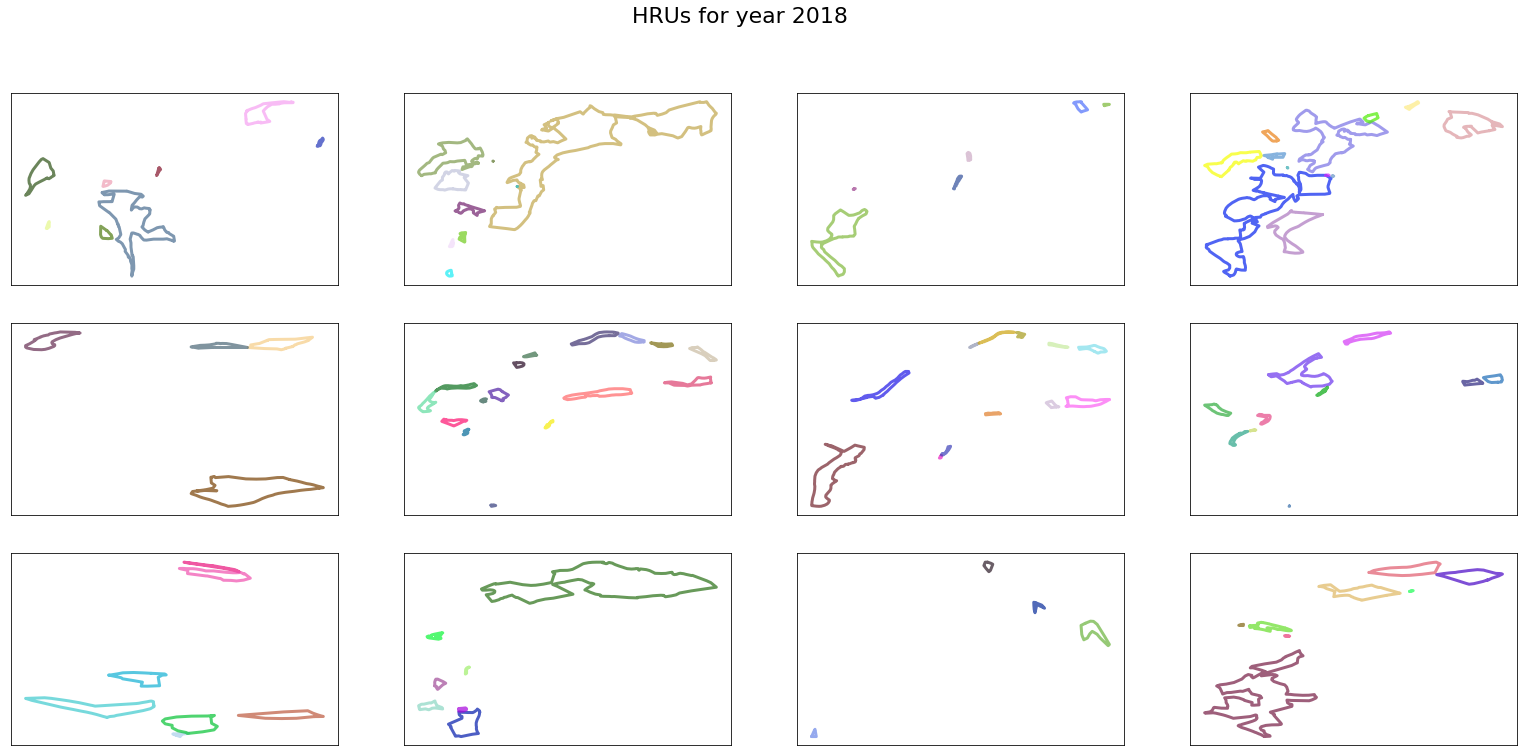

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


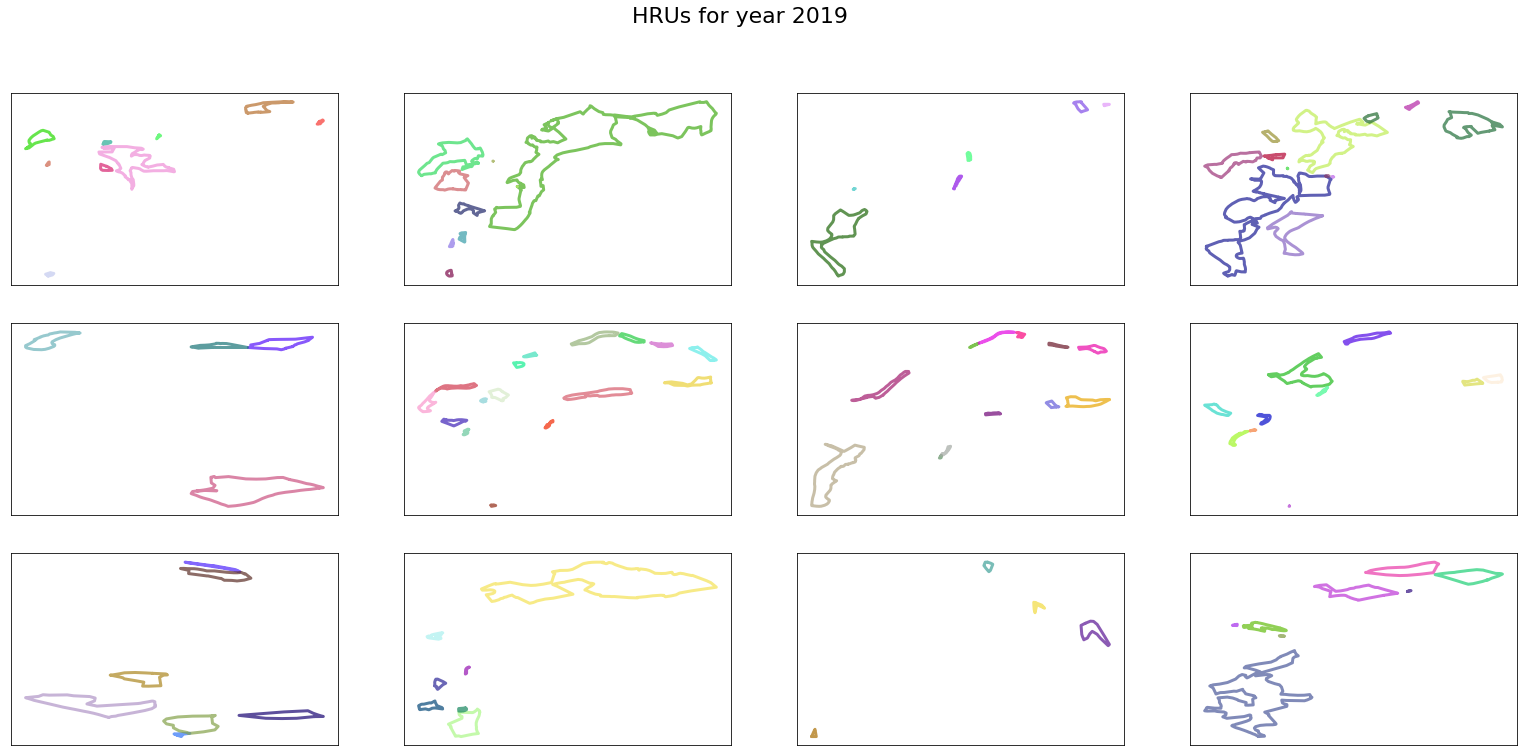

In [10]:
hru_object = MakeHRUs(
    'unique_lu_soil',
    index=years,
    soil_shape={'shapefile': Soil_shp, 'feature': 'SOIL_GROUP'}
)

hru_object.call()

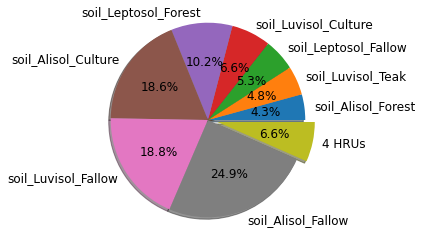

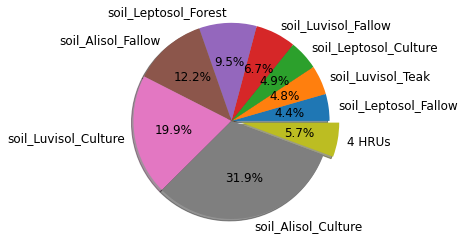

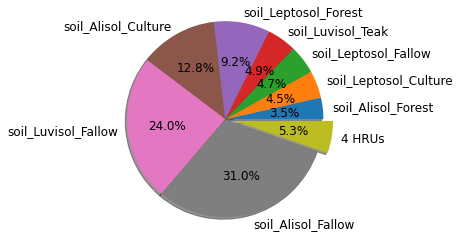

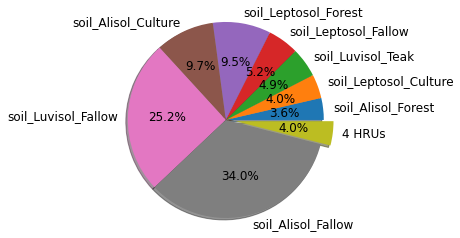

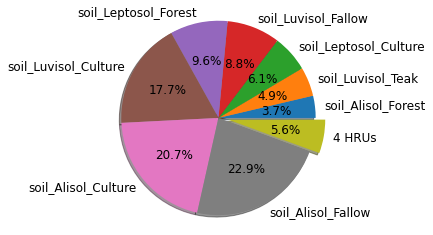

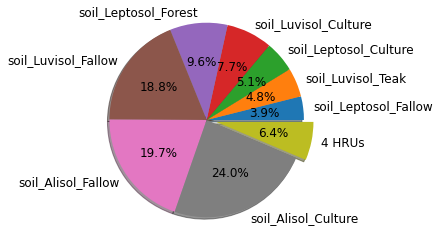

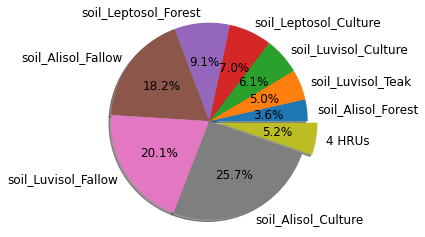

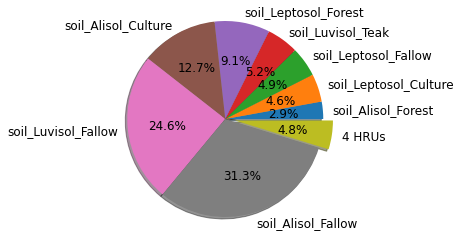

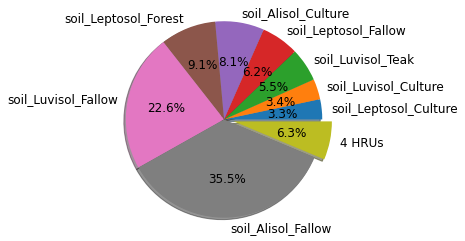

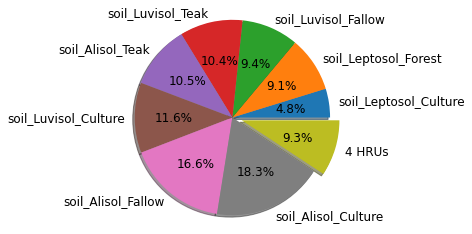

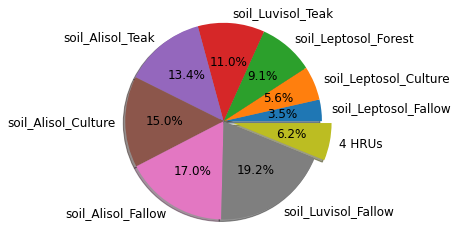

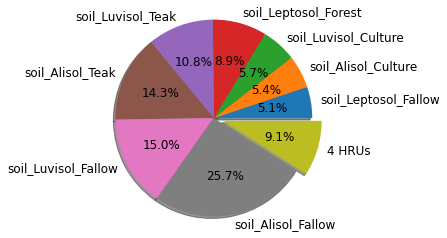

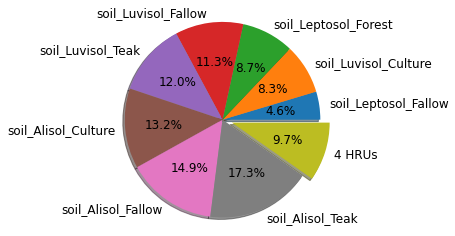

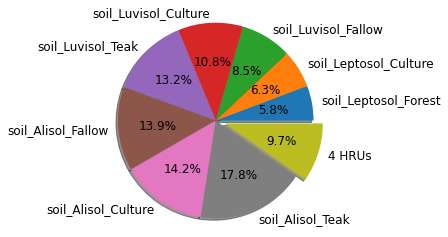

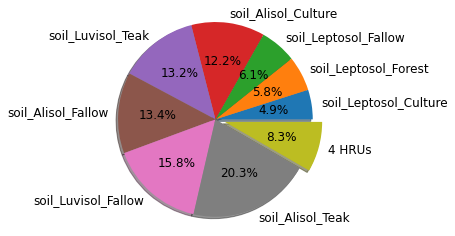

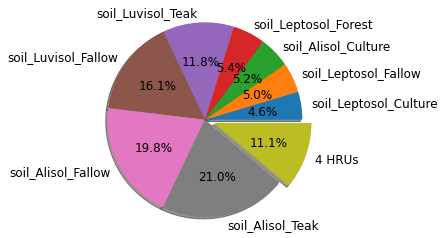

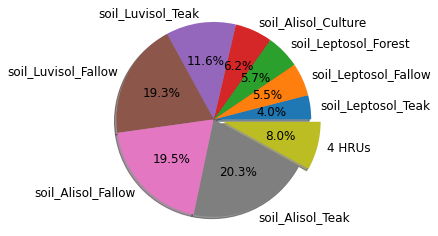

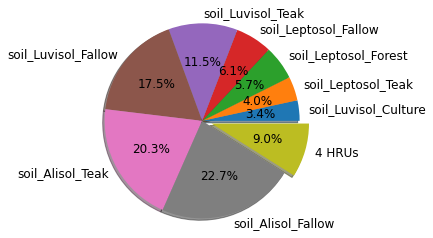

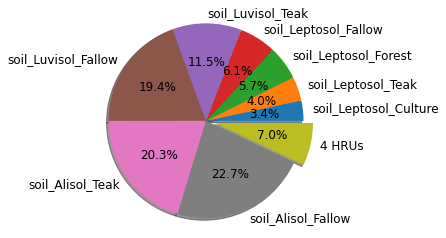

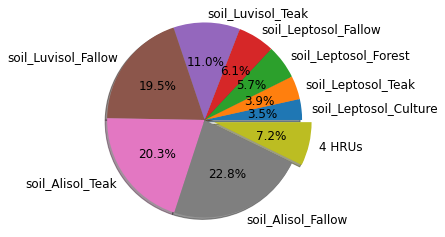

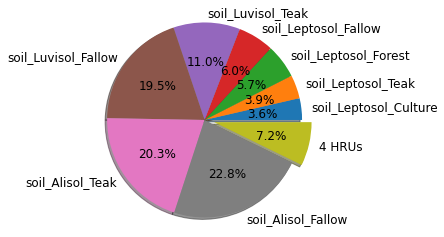

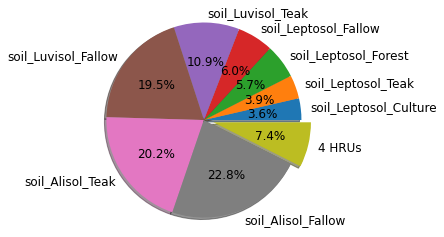

In [11]:
for yr in years:
    hru_object.draw_pie(yr, n_merge=4, title=False, textprops={'fontsize': '12'})

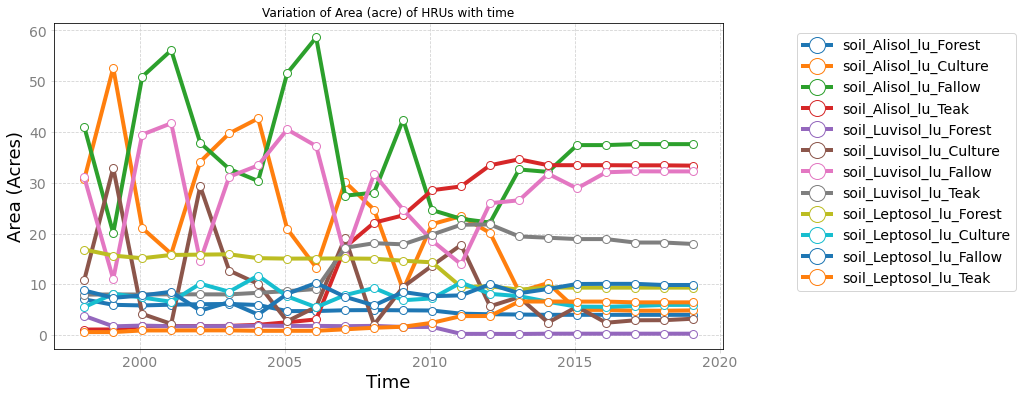

In [12]:
_ = hru_object.plot_as_ts(min_xticks=3, max_xticks=4)